In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)

In [2]:
prev_data = pd.read_csv('previous_application.csv')
prev_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [3]:
desc_data = pd.read_csv('columns_description.csv',encoding = "ISO-8859-1")
desc_data[122:].style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])

,Unnamed: 0,Table,Row,Description,Special
122,176,previous_application.csv,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)",hashed
123,177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
124,178,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",nan
125,179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,nan
126,180,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the previous application,nan
127,181,previous_application.csv,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",nan
128,182,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application,nan
129,183,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application,nan
130,184,previous_application.csv,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for previous application,nan
131,185,previous_application.csv,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client apply for the previous application,rounded


In [4]:
prev_data = prev_data.groupby(by="SK_ID_CURR",).sum()

In [5]:
prev_data.reset_index(inplace = True)

In [6]:
prev_data

,SK_ID_CURR,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100001,1369693,3951.000,24835.5,23787.0,2520.0,24835.5,13,1,0.104326,0.0,0.0,-1740,23,8.0,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
1,100002,1038818,9251.775,179055.0,179055.0,0.0,179055.0,9,1,0.000000,0.0,0.0,-606,500,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0
2,100003,6843451,169661.970,1306309.5,1452573.0,6885.0,1306309.5,44,3,0.100061,0.0,0.0,-3915,1599,30.0,1095729.0,-3823.0,-3013.0,-3163.0,-3142.0,2.0
3,100004,1564014,5357.250,24282.0,20106.0,4860.0,24282.0,5,1,0.212008,0.0,0.0,-815,30,4.0,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
4,100005,4353674,4813.200,44617.5,40153.5,4464.0,44617.5,21,2,0.108964,0.0,0.0,-1072,36,12.0,365243.0,-706.0,-376.0,-466.0,-460.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,2248017,6605.910,40455.0,40455.0,0.0,40455.0,17,1,0.000000,0.0,0.0,-273,30,8.0,365243.0,-210.0,0.0,-30.0,-25.0,0.0
338853,456252,1503599,10074.465,57595.5,56821.5,3456.0,57595.5,10,1,0.062443,0.0,0.0,-2497,190,6.0,365243.0,-2466.0,-2316.0,-2316.0,-2311.0,1.0
338854,456253,3354442,9540.810,48325.5,41251.5,8806.5,48325.5,23,2,0.428633,0.0,0.0,-4760,44,10.0,730486.0,-4678.0,-4438.0,-4438.0,-4425.0,1.0
338855,456254,3809317,21362.265,242635.5,268879.5,0.0,242635.5,30,2,0.000000,0.0,0.0,-599,3156,30.0,730486.0,-538.0,302.0,730486.0,730486.0,1.0


In [7]:
def percentage_series(series):
    return series.value_counts()*100/(series.shape[0] - series.isna().sum())

In [8]:
null_perc = prev_data.isna().sum()*100/prev_data.shape[0]
null_perc.sort_values(ascending=False,inplace=True)

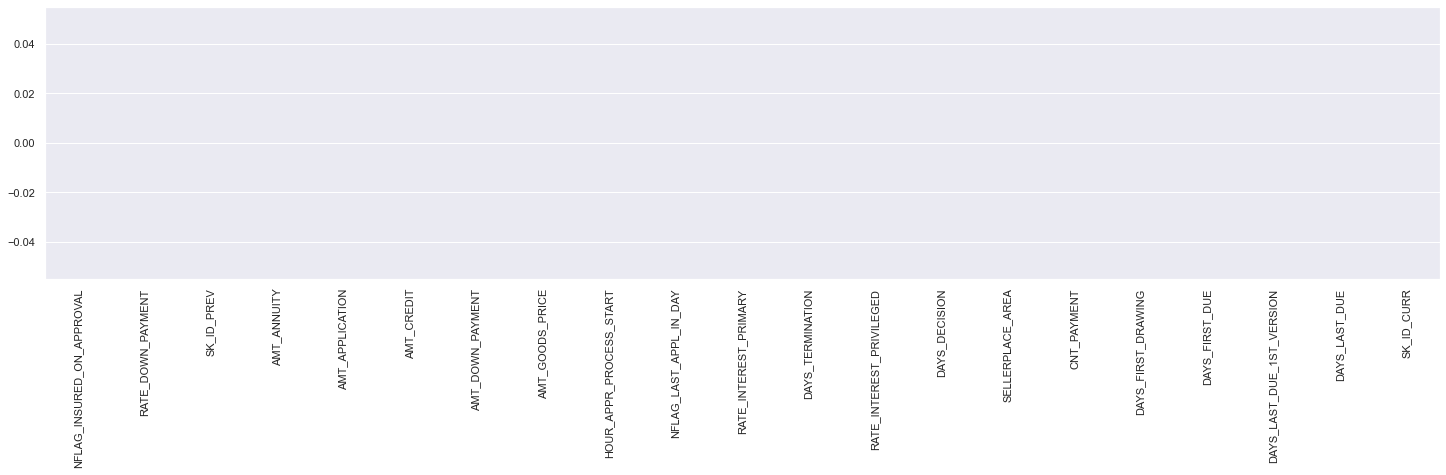

In [9]:
plt.figure(figsize=(25,5))
null_plot = sns.barplot(null_perc.index,null_perc)
loc, labels = plt.xticks()
null_plot.set_xticklabels(labels, rotation=90)
plt.show()

In [10]:
prev_data[null_perc[null_perc > 45].index]

""
0
1
2
3
4
...
338852
338853
338854
338855


In [11]:
prev_data.drop(columns=null_perc[null_perc > 45].index,inplace=True)
prev_data

,SK_ID_CURR,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100001,1369693,3951.000,24835.5,23787.0,2520.0,24835.5,13,1,0.104326,0.0,0.0,-1740,23,8.0,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
1,100002,1038818,9251.775,179055.0,179055.0,0.0,179055.0,9,1,0.000000,0.0,0.0,-606,500,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0
2,100003,6843451,169661.970,1306309.5,1452573.0,6885.0,1306309.5,44,3,0.100061,0.0,0.0,-3915,1599,30.0,1095729.0,-3823.0,-3013.0,-3163.0,-3142.0,2.0
3,100004,1564014,5357.250,24282.0,20106.0,4860.0,24282.0,5,1,0.212008,0.0,0.0,-815,30,4.0,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
4,100005,4353674,4813.200,44617.5,40153.5,4464.0,44617.5,21,2,0.108964,0.0,0.0,-1072,36,12.0,365243.0,-706.0,-376.0,-466.0,-460.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,2248017,6605.910,40455.0,40455.0,0.0,40455.0,17,1,0.000000,0.0,0.0,-273,30,8.0,365243.0,-210.0,0.0,-30.0,-25.0,0.0
338853,456252,1503599,10074.465,57595.5,56821.5,3456.0,57595.5,10,1,0.062443,0.0,0.0,-2497,190,6.0,365243.0,-2466.0,-2316.0,-2316.0,-2311.0,1.0
338854,456253,3354442,9540.810,48325.5,41251.5,8806.5,48325.5,23,2,0.428633,0.0,0.0,-4760,44,10.0,730486.0,-4678.0,-4438.0,-4438.0,-4425.0,1.0
338855,456254,3809317,21362.265,242635.5,268879.5,0.0,242635.5,30,2,0.000000,0.0,0.0,-599,3156,30.0,730486.0,-538.0,302.0,730486.0,730486.0,1.0


In [12]:
prev_data.groupby(by="SK_ID_CURR").sum()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,
100001,1369693,3951.000,24835.5,23787.0,2520.0,24835.5,13,1,0.104326,0.0,0.0,-1740,23,8.0,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
100002,1038818,9251.775,179055.0,179055.0,0.0,179055.0,9,1,0.000000,0.0,0.0,-606,500,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0
100003,6843451,169661.970,1306309.5,1452573.0,6885.0,1306309.5,44,3,0.100061,0.0,0.0,-3915,1599,30.0,1095729.0,-3823.0,-3013.0,-3163.0,-3142.0,2.0
100004,1564014,5357.250,24282.0,20106.0,4860.0,24282.0,5,1,0.212008,0.0,0.0,-815,30,4.0,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
100005,4353674,4813.200,44617.5,40153.5,4464.0,44617.5,21,2,0.108964,0.0,0.0,-1072,36,12.0,365243.0,-706.0,-376.0,-466.0,-460.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,2248017,6605.910,40455.0,40455.0,0.0,40455.0,17,1,0.000000,0.0,0.0,-273,30,8.0,365243.0,-210.0,0.0,-30.0,-25.0,0.0
456252,1503599,10074.465,57595.5,56821.5,3456.0,57595.5,10,1,0.062443,0.0,0.0,-2497,190,6.0,365243.0,-2466.0,-2316.0,-2316.0,-2311.0,1.0
456253,3354442,9540.810,48325.5,41251.5,8806.5,48325.5,23,2,0.428633,0.0,0.0,-4760,44,10.0,730486.0,-4678.0,-4438.0,-4438.0,-4425.0,1.0


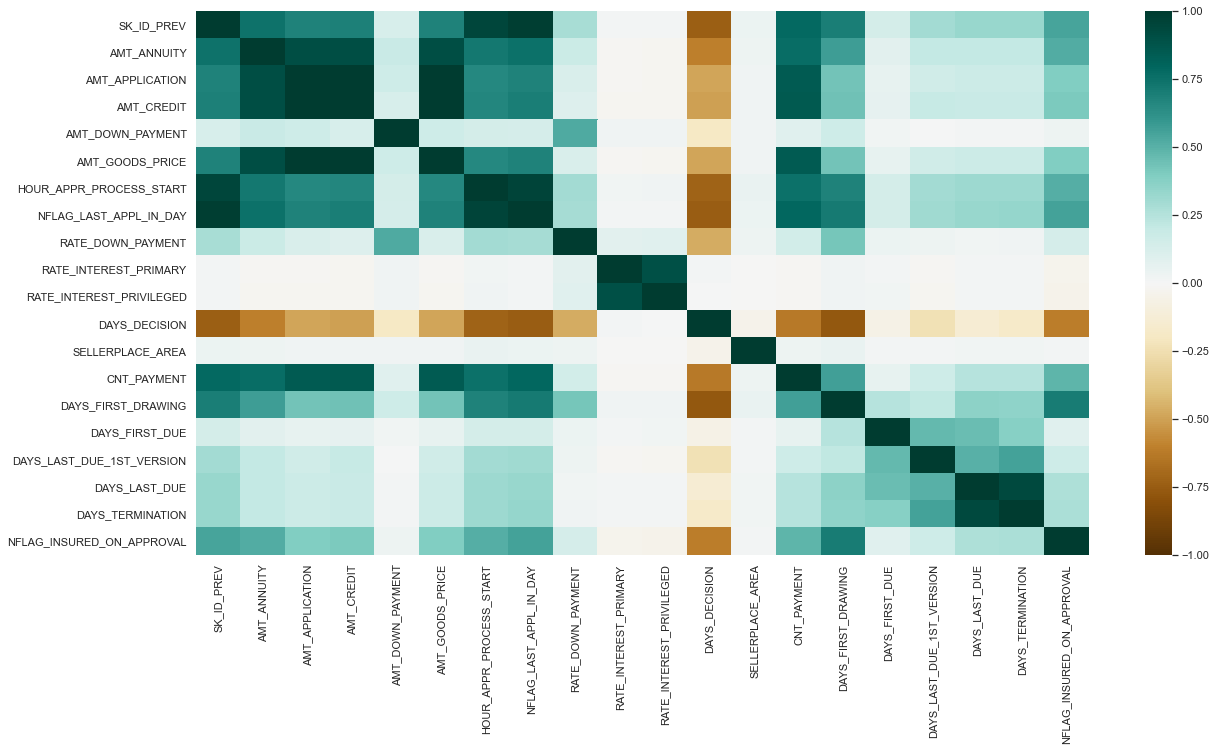

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(prev_data.groupby(by="SK_ID_CURR").sum().corr(),cmap='BrBG',vmin=-1,vmax=1)
plt.show()

In [14]:
prev_data.groupby(by="SK_ID_CURR").sum().corr()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,1.000000,0.742831,0.679954,0.691136,0.131376,0.680011,0.948239,0.988745,0.286140,0.011160,0.012826,-0.740132,0.042336,0.787737,0.699943,0.144424,0.301587,0.328807,0.330562,0.549836
AMT_ANNUITY,0.742831,1.000000,0.909379,0.913713,0.191859,0.909397,0.723838,0.750556,0.187162,-0.014874,-0.017252,-0.602067,0.033055,0.771983,0.572991,0.083184,0.204016,0.207562,0.209669,0.516527
AMT_APPLICATION,0.679954,0.909379,1.000000,0.992272,0.166886,0.999934,0.658671,0.686056,0.120068,-0.014820,-0.017251,-0.492010,0.025579,0.846624,0.434901,0.055116,0.163377,0.179485,0.178891,0.396930
AMT_CREDIT,0.691136,0.913713,0.992272,1.000000,0.131298,0.992297,0.668591,0.696437,0.104906,-0.017685,-0.020244,-0.505067,0.024377,0.858134,0.440647,0.065334,0.199733,0.191776,0.194933,0.412754
AMT_DOWN_PAYMENT,0.131376,0.191859,0.166886,0.131298,1.000000,0.166853,0.141794,0.134844,0.523921,0.029052,0.029392,-0.190463,0.025879,0.093462,0.167466,0.019519,0.006926,0.011177,0.012286,0.033209
AMT_GOODS_PRICE,0.680011,0.909397,0.999934,0.992297,0.166853,1.000000,0.658715,0.686103,0.120058,-0.014826,-0.017257,-0.492014,0.025565,0.846566,0.434842,0.055076,0.163329,0.179476,0.178877,0.396886
HOUR_APPR_PROCESS_START,0.948239,0.723838,0.658671,0.668591,0.141794,0.658715,1.000000,0.957361,0.303318,0.022114,0.025025,-0.725908,0.047935,0.753276,0.680943,0.145503,0.297825,0.318486,0.320271,0.511265
NFLAG_LAST_APPL_IN_DAY,0.988745,0.750556,0.686056,0.696437,0.134844,0.686103,0.957361,1.000000,0.292775,0.011665,0.013462,-0.749324,0.043093,0.796364,0.714008,0.147928,0.305541,0.335379,0.336587,0.558828
RATE_DOWN_PAYMENT,0.286140,0.187162,0.120068,0.104906,0.523921,0.120058,0.303318,0.292775,1.000000,0.078212,0.088132,-0.464592,0.033425,0.150075,0.427527,0.042617,0.034825,0.018301,0.026009,0.133810
RATE_INTEREST_PRIMARY,0.011160,-0.014874,-0.014820,-0.017685,0.029052,-0.014826,0.022114,0.011665,0.078212,1.000000,0.902708,0.007884,-0.000549,-0.007889,0.024640,0.014232,-0.014625,0.012027,0.012086,-0.035699
